<a href="https://colab.research.google.com/github/Amir-h055/Image-Procccessing/blob/main/image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q -U keras-tuner

     |████████████████████████████████| 133 kB 6.9 MB/s 


In [ ]:
#Connecting to GitHub
import os
import glob
import shutil
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import cv2

%tensorflow_version 2.x 
# TensorFlow and tf.keras
import tensorflow as tf
import seaborn as sns
from fastai.vision import *
from numpy.ma.core import size
from fastai.vision.data import ImageDataBunch
from fastai.vision.transform import get_transforms
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, BatchNormalization


import keras_tuner as kt
from keras_tuner import RandomSearch

from kerastuner.engine.hyperparameters import HyperParameters
from sklearn.model_selection import train_test_split


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path ='/content/drive/My Drive/Comp 478 - Project/Chest X-ray (Covid-19 & Pneumonia)/Data'
train_directory = '/content/drive/My Drive/Comp 478 - Project/Chest X-ray (Covid-19 & Pneumonia)/Data/train'
test_directory = '/content/drive/My Drive/Comp 478 - Project/Chest X-ray (Covid-19 & Pneumonia)/Data/test'
validation_directory = r'/content/drive/My Drive/Comp 478 - Project/Chest X-ray (Covid-19 & Pneumonia)/Data/validation' 

In [ ]:
SIZE = 140
BATCH_SIZE = 64
TARGET_SIZE = (SIZE,SIZE)
EPOCH_NUM = 10

In [ ]:
categories_dict = {
  0: "COVID19",
  1: "NORMAL",
  2: "PNEUMONIA",
  
}

In [ ]:
image_gen = keras.preprocessing.image.ImageDataGenerator(
                                  rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                              horizontal_flip = True, 
                               )
image_split_train_validation = keras.preprocessing.image.ImageDataGenerator(
                                  validation_split = 0.2
                               )


#Do NOT RUN THIS


###Seperating Image into Training Dataset and Validation Dataset




In [ ]:
# train = image_split_train_validation.flow_from_directory(
#     train_directory,
#     subset = "training"
#     )
# validation = image_split_train_validation.flow_from_directory(
#     train_directory,
#     subset = "validation"
#     )

Found 4116 images belonging to 3 classes.
Found 1028 images belonging to 3 classes.


In [ ]:
# train.class_indices

{'COVID19': 0, 'NORMAL': 1, 'PNEUMONIA': 2}

[Text(0, 0.5, 'Number of Images'),
 Text(0.5, 0, 'Class'),
 Text(0.5, 1.0, 'Inital Training Dataset')]

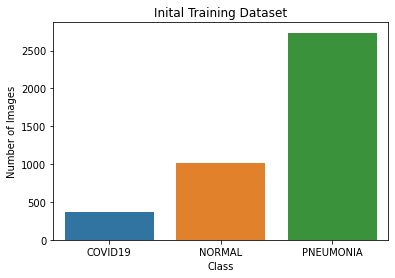

In [ ]:
# image_labels = []
# for  label in train.classes:
#   image_labels.append(categories_dict[label])

# df = pd.DataFrame(image_labels)
# sns.countplot(x=0, data= df).set(Title='Inital Training Dataset', xlabel='Class', ylabel='Number of Images')

#DO NOT RUN THIS


### Moving The Validation X-Rays To Validation Folder



In [ ]:
# if not os.path.exists(validation_directory):
#     os.makedirs(validation_directory)
    
# if not os.path.exists(validation_directory +"/COVID19"):
#     os.makedirs(validation_directory +"/COVID19")

# if not os.path.exists(validation_directory +"/NORMAL"):
#     os.makedirs(validation_directory +"/NORMAL")

# if not os.path.exists(validation_directory +"/PNEUMONIA"):
#     os.makedirs(validation_directory +"/PNEUMONIA")

# for i, label in enumerate(validation.classes):
#   if not os.path.exists(validation_directory+"/"+validation.filenames[i]):
#     if label == 0:
#       shutil.move(validation.filepaths[i], validation_directory+"/"+validation.filenames[i])
#     if label == 1:
#       shutil.move(validation.filepaths[i], validation_directory+"/"+validation.filenames[i])
#     if label == 2:
#       shutil.move(validation.filepaths[i], validation_directory+"/"+validation.filenames[i])



###Fetching Validation X-Rays From New Directory 


In [ ]:
validation = image_gen.flow_from_directory(validation_directory)

Found 1028 images belonging to 3 classes.


###Fetching Training X-Rays From New Directory 


In [ ]:
train = image_gen.flow_from_directory(train_directory)

Found 4116 images belonging to 3 classes.


###Some X-Rays Images

In [ ]:
tfms = get_transforms (do_flip=True, max_rotate=10.0);
dataTrain = ImageDataBunch.from_folder(path, train='train', size=2000);

/usr/local/lib/python3.7/dist-packages/fastai/data_block.py:461: UserWarning: Your validation set is empty. If this is by design, use `split_none()`
                 or pass `ignore_empty=True` when labelling to remove this warning.
  or pass `ignore_empty=True` when labelling to remove this warning.""")


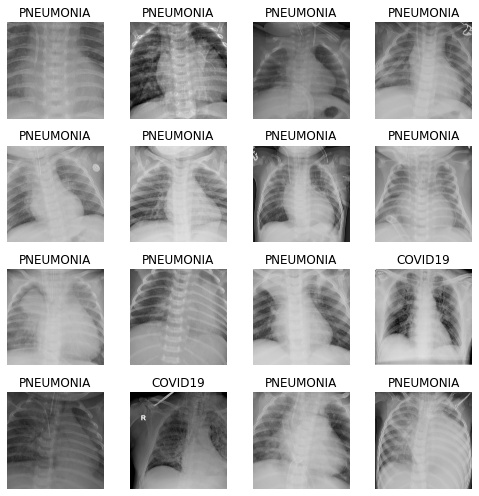

In [ ]:
dataTrain.show_batch(rows=4, figsize=(7,7))

#DO NOT RUN THIS 

###Augmenting The Training Images for COVID19 and NORMAL


In [ ]:
# aug_image_path = {
#   0: '/content/drive/My Drive/Comp 478 - Project/Chest X-ray (Covid-19 & Pneumonia)/Data/train/COVID19',
#   1: '/content/drive/My Drive/Comp 478 - Project/Chest X-ray (Covid-19 & Pneumonia)/Data/train/NORMAL',  
# }
# aug_image_prefix = {
#   0: 'COVID19_AUG',
#   1: 'NORMAL_AUG',  
# }

# number_of_aug_img = 0
# for i, label in enumerate(train.classes):
#   if label == 0 or label == 1:
#     if label == 0:
#       aug_image_counter = 6
#     else:
#       aug_image_counter = 2

#     img = cv2.imread(train.filepaths[i])
#     x = tf.keras.preprocessing.image.img_to_array(img)
#     x = x.reshape((1,) + x.shape)

#     counter = 0
#     for batch in image_gen.flow(x, batch_size= aug_image_counter, save_to_dir=aug_image_path[label], save_prefix= f'{aug_image_prefix[label]}_{i}', save_format="jpg"):
#       number_of_aug_img += 1
#       counter += 1
#       if(number_of_aug_img%200==0): print(number_of_aug_img,"Augmented Images")

#       if(counter >= aug_image_counter):
#         break



200 Augmented Images
400 Augmented Images
600 Augmented Images
800 Augmented Images
1000 Augmented Images
1200 Augmented Images
1400 Augmented Images
1600 Augmented Images
1800 Augmented Images
2000 Augmented Images
2200 Augmented Images
2400 Augmented Images
2600 Augmented Images
2800 Augmented Images
3000 Augmented Images
3200 Augmented Images
3400 Augmented Images
3600 Augmented Images
3800 Augmented Images
4000 Augmented Images
4200 Augmented Images


###Augmenting The Validation Images for COVID19 and NORMAL





In [ ]:
# aug_image_path = {
#   0: '/content/drive/My Drive/Comp 478 - Project/Chest X-ray (Covid-19 & Pneumonia)/Data/validation/COVID19',
#   1: '/content/drive/My Drive/Comp 478 - Project/Chest X-ray (Covid-19 & Pneumonia)/Data/validation/NORMAL',  
# }
# aug_image_prefix = {
#   0: 'COVID19_AUG',
#   1: 'NORMAL_AUG',  
# }

# number_of_aug_img = 0
# for i, label in enumerate(validation.classes):
#   if label == 0 or label == 1:
#     if label == 0:
#       aug_image_counter = 6
#     else:
#       aug_image_counter = 2

#     img = cv2.imread(validation.filepaths[i])
#     x = tf.keras.preprocessing.image.img_to_array(img)
#     x = x.reshape((1,) + x.shape)

#     counter = 0
#     for batch in image_gen.flow(x, batch_size= aug_image_counter, save_to_dir=aug_image_path[label], save_prefix= f'{aug_image_prefix[label]}_{i}', save_format="jpg"):
#       number_of_aug_img += 1
#       counter += 1
#       if(number_of_aug_img%200==0): print(number_of_aug_img,"Augmented Images")

#       if(counter >= aug_image_counter):
#         break

In [ ]:
ls  '/content/drive/My Drive/Comp 478 - Project/Chest X-ray (Covid-19 & Pneumonia)/Data/validation/COVID19';

In [ ]:
#ls -lh '/content/drive/My Drive/Comp 478 - Project/Chest X-ray (Covid-19 & Pneumonia)/Data/validation/PNEUMONIA';

###Fetching Augmented X-Ray Image for Training and Validation and Test set


In [ ]:
data_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255 )

train_balanced = data_gen.flow_from_directory(
      train_directory, 
      target_size= TARGET_SIZE,
      color_mode='grayscale',
      batch_size=999999
      )

validation_set = data_gen.flow_from_directory(
      validation_directory, 
      target_size= TARGET_SIZE,
      color_mode='grayscale',
      batch_size=999999
      )


test_set = data_gen.flow_from_directory(
      test_directory, 
      target_size= TARGET_SIZE,
      color_mode='grayscale',
      batch_size=999999
      )

Found 8349 images belonging to 3 classes.
Found 1028 images belonging to 3 classes.
Found 1299 images belonging to 3 classes.


[Text(0, 0.5, 'Number of Images'),
 Text(0.5, 0, 'Class'),
 Text(0.5, 1.0, 'Balanced Training Dataset')]

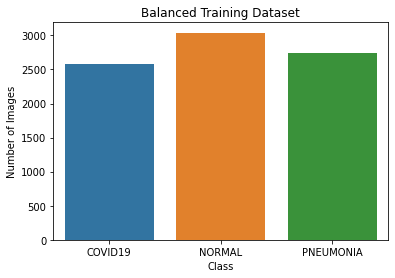

In [ ]:
image_labels = []
for  label in train_balanced.classes:
  image_labels.append(categories_dict[label])

df = pd.DataFrame(image_labels)
sns.countplot(x=0, data= df).set(Title='Balanced Training Dataset', xlabel='Class', ylabel='Number of Images')

[Text(0, 0.5, 'Number of Images'),
 Text(0.5, 0, 'Class'),
 Text(0.5, 1.0, 'Validation Dataset')]

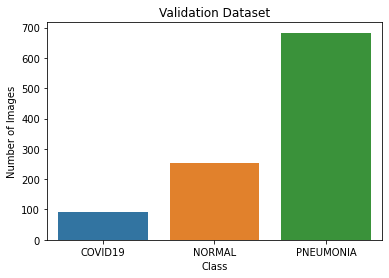

In [ ]:
image_labels = []
for  label in validation_set.classes:
  image_labels.append(categories_dict[label])

df = pd.DataFrame(image_labels)
sns.countplot(x=0, data= df).set(Title='Validation Dataset', xlabel='Class', ylabel='Number of Images')

[Text(0, 0.5, 'Number of Images'),
 Text(0.5, 0, 'Class'),
 Text(0.5, 1.0, 'Test Dataset')]

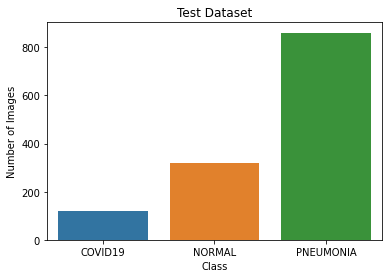

In [ ]:
image_labels = []
for  label in test_set.classes:
  image_labels.append(categories_dict[label])

df = pd.DataFrame(image_labels)
sns.countplot(x=0, data= df).set(Title='Test Dataset', xlabel='Class', ylabel='Number of Images')

In [ ]:
#TARGET_SIZE = (64, 64)

In [ ]:
#ls '/content/drive/My Drive/Comp 478 - Project/Chest X-ray (Covid-19 & Pneumonia)/Data/train/COVID19'

In [ ]:
X_train = []
y_train = []
X_train, y_train = next(train_balanced)

In [ ]:
X_train.shape, y_train.shape

((8349, 140, 140, 1), (8349, 3))

In [ ]:
X_valid = []
y_valid = []
X_valid, y_valid = next(validation_set)

In [ ]:
X_valid.shape, y_valid.shape

In [ ]:
X_test = []
y_test = []
X_test, y_test = next(test_set)

In [ ]:
X_test.shape, y_test.shape

((1299, 140, 140, 1), (1299, 3))

In [ ]:
len(train_balanced)

1

In [ ]:
#from tqdm import tqdm
#X_train = []
#y_train = []
#for X, y in tqdm(train_balanced, total=len(train_balanced)):
#  print("\nx\n")
#  print(X)
#  print("\ny\n")
#  print(y)
#  X_train.append(X)
#  y_train.append(y)

In [ ]:
# X_train = np.concatenate(X_train)
# y_train = np.concatenate(y_train)
# X_valid = np.concatenate(X_valid)
# y_valid = np.concatenate(y_valid)

Save the **Train** and **validation** array

In [ ]:
np.save(file = '/content/drive/My Drive/Comp 478 - Project/Chest X-ray (Covid-19 & Pneumonia)/Data/X_train', arr=X_train)
np.save(file = '/content/drive/My Drive/Comp 478 - Project/Chest X-ray (Covid-19 & Pneumonia)/Data/y_train', arr=y_train)

np.save(file = '/content/drive/My Drive/Comp 478 - Project/Chest X-ray (Covid-19 & Pneumonia)/Data/X_valid', arr=X_valid)
np.save(file = '/content/drive/My Drive/Comp 478 - Project/Chest X-ray (Covid-19 & Pneumonia)/Data/y_valid', arr=y_valid)

np.save(file = '/content/drive/My Drive/Comp 478 - Project/Chest X-ray (Covid-19 & Pneumonia)/Data/X_test', arr=X_test)
np.save(file = '/content/drive/My Drive/Comp 478 - Project/Chest X-ray (Covid-19 & Pneumonia)/Data/y_test', arr=y_test)

In [ ]:
ls -lh '/content/drive/My Drive/Comp 478 - Project/Chest X-ray (Covid-19 & Pneumonia)/Data'

total 799M
drwx------ 5 root root 4.0K Apr 13 21:42 test/
drwx------ 5 root root 4.0K Apr 15 13:24 train/
drwx------ 5 root root 4.0K Apr 15 14:27 validation/
-rw------- 1 root root  98M Apr 15 17:48 X_test.npy
-rw------- 1 root root 625M Apr 15 17:37 X_train.npy
-rw------- 1 root root  77M Apr 15 17:37 X_valid.npy
-rw------- 1 root root  16K Apr 15 17:48 y_test.npy
-rw------- 1 root root  98K Apr 15 17:37 y_train.npy
-rw------- 1 root root  13K Apr 15 17:37 y_valid.npy


### Load the Train and Validation array ( on next run Continue from here , no need to run prev code)

In [ ]:
X_train = np.load('/content/drive/My Drive/Comp 478 - Project/Chest X-ray (Covid-19 & Pneumonia)/Data/X_train.npy')
y_train = np.load('/content/drive/My Drive/Comp 478 - Project/Chest X-ray (Covid-19 & Pneumonia)/Data/y_train.npy')
X_valid = np.load('/content/drive/My Drive/Comp 478 - Project/Chest X-ray (Covid-19 & Pneumonia)/Data/X_valid.npy')
y_valid = np.load('/content/drive/My Drive/Comp 478 - Project/Chest X-ray (Covid-19 & Pneumonia)/Data/y_valid.npy')

X_test = np.load('/content/drive/My Drive/Comp 478 - Project/Chest X-ray (Covid-19 & Pneumonia)/Data/X_test.npy')
y_test = np.load('/content/drive/My Drive/Comp 478 - Project/Chest X-ray (Covid-19 & Pneumonia)/Data/y_test.npy')

<h1>Training CNN</h1>

### Initialize some performance metrix

In [ ]:
# snipset from :https://datascience.stackexchange.com/a/45166
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
from fastai import layers
def build_model(X_train):  
  model = keras.models.Sequential([
    keras.layers.Conv2D(
        filters=16,
        kernel_size=6,
        activation='relu',
        input_shape=X_train.shape[1:]
    ),
    (Dropout(0.3)),
    keras.layers.Conv2D(
        filters=32,
        kernel_size=3,
        activation='relu'
    ),

     keras.layers.Conv2D(
        filters=64,
        kernel_size=3,
        activation='relu'
    ),
    BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3)),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=16,
        activation='relu'
    ),
    keras.layers.Dense(3, activation='softmax')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(lr=0.0001),
              loss='categorical_crossentropy',
              metrics=[keras.metrics.CategoricalAccuracy(),f1_m])
  
  return model

In [ ]:
# 64, 140, 140, 1)
X_train.shape

(8349, 140, 140, 1)

In [ ]:
model = build_model(X_train)
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 135, 135, 16)      592       
                                                                 
 dropout_3 (Dropout)         (None, 135, 135, 16)      0         
                                                                 
 conv2d_24 (Conv2D)          (None, 133, 133, 32)      4640      
                                                                 
 conv2d_25 (Conv2D)          (None, 131, 131, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 131, 131, 64)     256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                  

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
tf.test.is_gpu_available()

True

In [ ]:
model.fit(X_train, y_train, batch_size=32, epochs=27, validation_data=(X_valid, y_valid))

Epoch 1/27
261/261 [==============================] - 16s 60ms/step - loss: 1.1227 - categorical_accuracy: 0.3796 - f1_m: 0.0391 - val_loss: 1.0798 - val_categorical_accuracy: 0.3356 - val_f1_m: 0.0865
Epoch 2/27
261/261 [==============================] - 15s 57ms/step - loss: 0.7705 - categorical_accuracy: 0.7127 - f1_m: 0.5140 - val_loss: 0.7189 - val_categorical_accuracy: 0.7996 - val_f1_m: 0.6497
Epoch 3/27
261/261 [==============================] - 15s 58ms/step - loss: 0.5584 - categorical_accuracy: 0.8811 - f1_m: 0.7015 - val_loss: 0.8397 - val_categorical_accuracy: 0.7607 - val_f1_m: 0.7526
Epoch 4/27
261/261 [==============================] - 15s 58ms/step - loss: 0.5128 - categorical_accuracy: 0.9086 - f1_m: 0.7184 - val_loss: 0.6585 - val_categorical_accuracy: 0.7977 - val_f1_m: 0.7951
Epoch 5/27
261/261 [==============================] - 15s 57ms/step - loss: 0.4656 - categorical_accuracy: 0.9260 - f1_m: 0.7328 - val_loss: 0.8318 - val_categorical_accuracy: 0.7821 - val_f1_

------

In [ ]:
def predict(model, image, correct_label):
  prediction = model.predict(np.array([image]))
  print(prediction)
  predicted_class = categories_dict[np.argmax(prediction)]
  show_image(image, categories_dict[correct_label], predicted_class)

In [ ]:
model.evaluate(X_test, y_test)

41/41 [==============================] - 1s 21ms/step - loss: 0.3322 - categorical_accuracy: 0.9469 - f1_m: 0.9462


[0.33222874999046326, 0.9468821883201599, 0.9462082982063293]

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_valid = model.predict(X_valid)
y_pred_test = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, plot_confusion_matrix

In [ ]:

print("Train")
print(classification_report(y_train.argmax(axis=1), y_pred_train.argmax(axis=1)))

print("\n***********\nValid")
print(classification_report(y_valid.argmax(axis=1), y_pred_valid.argmax(axis=1)))

print("\n***********\nTest")
print(classification_report(y_test.argmax(axis=1), y_pred_test.argmax(axis=1)))


Train
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2575
           1       0.99      0.99      0.99      3039
           2       0.98      0.99      0.99      2735

    accuracy                           0.99      8349
   macro avg       0.99      0.99      0.99      8349
weighted avg       0.99      0.99      0.99      8349


***********
Valid
              precision    recall  f1-score   support

           0       0.92      0.91      0.92        92
           1       0.89      0.91      0.90       253
           2       0.96      0.95      0.96       683

    accuracy                           0.94      1028
   macro avg       0.92      0.93      0.92      1028
weighted avg       0.94      0.94      0.94      1028


***********
Test
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       118
           1       0.91      0.90      0.90       320
           2       0.96      0.9

In [ ]:
confusion = pd.crosstab(y_test.argmax(axis=1), y_pred_test.argmax(axis=1)).reindex(columns=range(3)).fillna(0)

In [ ]:
confusion

col_0,0,1,2
row_0,,,
0,115,1,2
1,2,292,26
2,12,44,805


In [ ]:
import seaborn as sns

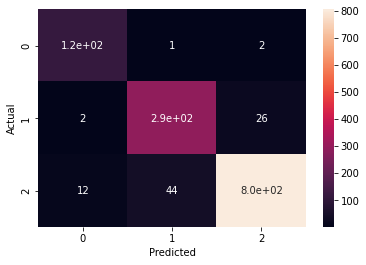

In [ ]:
sns.heatmap(confusion, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual');

(140, 140, 1)

# EfficientNetB0

In [ ]:
effnet = tf.keras.applications.EfficientNetB0(
    include_top=False,
    weights="imagenet",
    pooling='max',
    input_shape=(X_train.shape[1], X_train.shape[2], 3),

)

In [ ]:
input_layer = tf.keras.layers.Input(shape=X_train.shape[1:])
x = tf.keras.layers.Conv2D(3, (3,3), padding='same')(input_layer)
x = effnet(x)
out = tf.keras.layers.Dense(3, activation='softmax')(x)
model = tf.keras.models.Model(inputs=input_layer, outputs=out)

In [ ]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 140, 140, 1)]     0         
                                                                 
 conv2d_10 (Conv2D)          (None, 140, 140, 3)       30        
                                                                 
 efficientnetb0 (Functional)  (None, 1280)             4049571   
                                                                 
 dense_6 (Dense)             (None, 3)                 3843      
                                                                 
Total params: 4,053,444
Trainable params: 4,011,421
Non-trainable params: 42,023
_________________________________________________________________


In [ ]:
model.compile(optimizer=keras.optimizers.Adam(lr=0.0001),
              loss='categorical_crossentropy',
              metrics=['acc',f1_m])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model.fit(X_train, y_train, batch_size=32, epochs=7, validation_data=(X_valid, y_valid))

Epoch 1/7
2/2 [==============================] - 9s 2s/step - loss: 0.0466 - acc: 0.9844 - f1_m: 0.9764 - val_loss: 1.1149 - val_acc: 0.2188 - val_f1_m: 0.0000e+00
Epoch 2/7
2/2 [==============================] - 0s 216ms/step - loss: 0.0742 - acc: 0.9844 - f1_m: 0.9764 - val_loss: 1.0721 - val_acc: 0.5156 - val_f1_m: 0.0000e+00
Epoch 3/7
2/2 [==============================] - 0s 208ms/step - loss: 0.0582 - acc: 0.9844 - f1_m: 0.9844 - val_loss: 1.0546 - val_acc: 0.5156 - val_f1_m: 0.0000e+00
Epoch 4/7
2/2 [==============================] - 0s 216ms/step - loss: 0.1493 - acc: 0.9531 - f1_m: 0.9531 - val_loss: 1.0648 - val_acc: 0.5156 - val_f1_m: 0.0000e+00
Epoch 5/7
2/2 [==============================] - 0s 219ms/step - loss: 0.0226 - acc: 1.0000 - f1_m: 1.0000 - val_loss: 1.0955 - val_acc: 0.5156 - val_f1_m: 0.0000e+00
Epoch 6/7
2/2 [==============================] - 0s 212ms/step - loss: 0.0248 - acc: 0.9844 - f1_m: 0.9844 - val_loss: 1.1243 - val_acc: 0.5156 - val_f1_m: 0.5156
Epoch

In [ ]:
y_pred = model.predict(X_test)
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.69      1.00      0.81        44

    accuracy                           0.69        64
   macro avg       0.23      0.33      0.27        64
weighted avg       0.47      0.69      0.56        64



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
for i in range(len(test_data)):
  image = test_data[i]
  label = np.argmax(test_data[i])
  predict(model, image, label)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


ValueError: ignored

In [ ]:
#model.fit(train_balanced, validation_data=test_dataset, epochs=1)

  7/159 [>.............................] - ETA: 28:01 - loss: 1.0990 - accuracy: 0.3326

KeyboardInterrupt: ignored

In [ ]:
def build_model(hp):  
  model = keras.models.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(28,28,1)
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    keras.layers.Dense(10, activation='softmax')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3,'constant', 'invscaling', 'adaptive'])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [ ]:
6*6*2*26 * 5 * 5 / 24

1950.0

In [ ]:
image_labels = []
for  label in train.classes:
  image_labels.append(categories_dict[label])

df = pd.DataFrame(image_labels)
sns.countplot(x=0, data= df).set(Title='Augmented Dataset', xlabel='Class', ylabel='Number of Images')

In [ ]:
test = test_data_gen.flow_from_directory(
      test_directory,
      target_size=TARGET_SIZE,
      color_mode='grayscale',
      shuffle=False, 
      batch_size=BATCH_SIZE
      )

In [ ]:
image_labels = []
for  label in  test.classes:
  image_labels.append(categories_dict[label])

df = pd.DataFrame(image_labels)
sns.countplot(x=0, data= df).set(Title='Test Dataset', xlabel='Class', ylabel='Number of Images')

In [ ]:
def cnn_model():
# CNN Based Model in Keras
  model = keras.Sequential([
        keras.Input(shape=(140,140,1), name='Original_Images'),
        keras.layers.Conv2D(input_shape=(140,140,1), filters=32, kernel_size=11, 
                            strides=1, activation='relu', name='Conv1'),
        keras.layers.Conv2D(input_shape=(130,130,32), filters=32, kernel_size=11, 
                            strides=1, activation='relu', name='Conv2'),
        keras.layers.MaxPool2D(pool_size=(5, 5), strides=2),
        keras.layers.Conv2D(input_shape=(58,58,32), filters=64, kernel_size=9, 
                            strides=1, activation='relu', name='Conv3'),
        keras.layers.MaxPool2D(pool_size=(5, 5), strides=2),
        keras.layers.Conv2D(input_shape=(23,23,64), filters=128, kernel_size=8, 
                            strides=1, activation='relu', name='Conv4'),
        keras.layers.Conv2D(input_shape=(16,16,128), filters=256, kernel_size=9, 
                            strides=1, activation='relu', name='Conv5'),
        keras.layers.Conv2D(input_shape=(8,8,256), filters=256, kernel_size=8, 
                            strides=1, activation='relu', name='Conv6'),    

        keras.layers.Flatten(),
        keras.layers.Dense(8, activation=tf.keras.activations.relu, name='Dense'),
        keras.layers.Dense(3, activation="softmax")
    ])
  opt = keras.optimizers.Adam(learning_rate=0.005)
  model.compile(optimizer=opt, loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=[keras.metrics.CategoricalAccuracy()])
  return model

  

In [ ]:
model = cnn_model()

In [ ]:
keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
hist = model.fit(
    train_balanced
)

In [ ]:
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()

In [ ]:
def predict(model, image, correct_label):
  prediction = model.predict(np.array([image]))
  print(prediction)
  predicted_class = categories_dict[np.argmax(prediction)]
  show_image(image, categories_dict[correct_label], predicted_class)

In [ ]:
for i in range(len(test_images)):
  image = test_images[i]
  label = np.argmax(test_labels[i])
  predict(model, image, label)

**REMOVES THE AUGMENTED IMAGES**



In [ ]:
def remove_aug(path):
  files= glob.glob(path, recursive=True)
  for f in files:
      try:
          os.remove(f)
      except OSError as e:
          print("Error: %s : %s" % (f, e.strerror))

remove_aug('/content/drive/My Drive/Comp 478 - Project/Chest X-ray (Covid-19 & Pneumonia)/Data/train/COVID19/COVID19_AUG*.jpg')
remove_aug('/content/drive/My Drive/Comp 478 - Project/Chest X-ray (Covid-19 & Pneumonia)/Data/train/NORMAL/NORMAL_AUG*.jpg')